## How to access Hi-C map from .ccmap file?

`.ccmap` is a text file and associated `*.npbin` or `*.npbin.gz` is memory mapped matrix file.

***

**At first, we import modules:**

* [gcMapExplorer.ccmap](../ccmap.html)
* [numpy](http://docs.scipy.org/doc/numpy/reference/routines.html) for statistics
* [matplotlib](http://matplotlib.org/gallery.html) for plotting

In [1]:
import gcMapExplorer.ccmap as cmp
import numpy as np
import matplotlib.pyplot as plt

# To show inline plots
%matplotlib inline
plt.style.use('ggplot')              # Theme for plotting

#### Load a `.ccmap` file

In [2]:
ccmap = cmp.load_ccmap('output/CooMatrix/normalized/chr15_100kb_normKR.ccmap')

**Print some properties of Hi-C data**

In [3]:
print('shape: ', ccmap.shape)             # Shape of matrix along X and Y axis
print('Minimum value: ', ccmap.minvalue)  # Maximum value in Hi-C data
print('Maximum value: ', ccmap.maxvalue)  # Minimum value in Hi.C data
print('data-type: ', ccmap.dtype)         #  Data type for memory mapped matrix file
print('path to matrix file:', ccmap.path2matrix)

shape:  (1026, 1026)
Minimum value:  4.66654819319956e-06
Maximum value:  0.8729197978973389
data-type:  float32
path to matrix file: /tmp/npBinary__e5gpj90.tmp


***

#### Reading ``*.npbin`` file

In [4]:
ccmap.make_readable()         # npbin file is now readable


Now, Hi-C matrix is available as ``ccmap.matrix``.

***

#### Overview of Hi-C matrix

In [5]:
print(ccmap.matrix)

[[  4.66654819e-06   4.66654819e-06   4.66654819e-06 ...,   4.66654819e-06
    4.66654819e-06   4.66654819e-06]
 [  4.66654819e-06   4.66654819e-06   4.66654819e-06 ...,   4.66654819e-06
    4.66654819e-06   4.66654819e-06]
 [  4.66654819e-06   4.66654819e-06   4.66654819e-06 ...,   4.66654819e-06
    4.66654819e-06   4.66654819e-06]
 ..., 
 [  4.66654819e-06   4.66654819e-06   4.66654819e-06 ...,   2.78881878e-01
    1.35136917e-01   7.62707740e-02]
 [  4.66654819e-06   4.66654819e-06   4.66654819e-06 ...,   1.35136917e-01
    4.56013411e-01   4.66654819e-06]
 [  4.66654819e-06   4.66654819e-06   4.66654819e-06 ...,   7.62707740e-02
    4.66654819e-06   4.66654819e-06]]


***

#### Using numpy module

* We can use numpy module to compare properties from ``.ccmap`` file and from ``.npbin`` file.

* To find maximum and minimum of matrix, numpy functions [amin](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.amin.html) and [amax](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.amax.html) can be used.

In [6]:
print('shape: ', ccmap.shape, ccmap.matrix.shape)                # Shape of matrix along X and Y axis
print('Minimum value: ', ccmap.minvalue, np.amin(ccmap.matrix))  # Minimum value in Hi-C data using numpy.amin
print('Maximum value: ', ccmap.maxvalue, np.amax(ccmap.matrix))  # Maximum value in Hi.C data using numpy.amax


shape:  (1026, 1026) (1026, 1026)
Minimum value:  4.66654819319956e-06 4.66654819319956e-06
Maximum value:  0.8729197978973389 0.8729197978973389


***

#### Remove rows/columns with missing data

In [7]:
bData = ~ccmap.bNoData                          # Stores whther rows/columns has missing data
new_matrix = (ccmap.matrix[bData,:])[:,bData]   # Getting new matrix after removing row/columns of missing data
index_bData = np.nonzero(bData)[0]               # Getting indices of original matrix after removing missing data

print('Original shape: ', ccmap.matrix.shape)   # Shape of original matrix
print('New shape: ', new_matrix.shape)           # Shape of new matrix

Original shape:  (1026, 1026)
New shape:  (822, 822)


***

#### Whether matrix is balanced?

If matrix is balanced, sum of rows and coloumns will be always one. Sum of rows and columns can be easily calculated using [numpy.sum](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.sum.html) function.

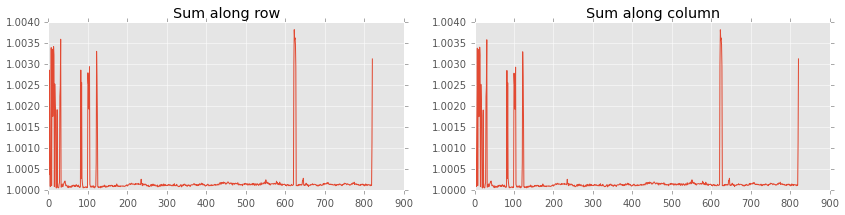

In [8]:
r_sum = np.sum(new_matrix, axis = 0)             # Sum along row using numpy.sum
c_sum = np.sum(new_matrix, axis = 1)             # Sum along column using numpy.sum

# Plot the values for visual representations
fig = plt.figure(figsize=(14,3))                               # Figure size

ax1 = fig.add_subplot(1,2,1)                                   # Axes first plot
ax1.set_title('Sum along row')                                 # Title first plot
ax1.get_yaxis().get_major_formatter().set_useOffset(False)     # Prevent ticks auto-formatting

ax2 = fig.add_subplot(1,2,2)                                   # Axes second plot
ax2.set_title('Sum along column')
ax2.get_yaxis().get_major_formatter().set_useOffset(False)

ax1.plot(r_sum)                                                # Plot in first axes
ax2.plot(c_sum)                                                # Plot in second axes

plt.show()

As can be seen in the above plot, sum of rows/columns are approximately one. It means that the matrix is balanced.

***

#### Using more numpy modules

Lets plot average and median of each rows using [numpy.mean](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.mean.html) and [numpy.median](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.median.html).

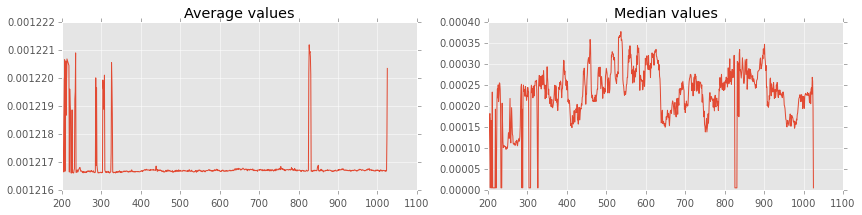

In [9]:
averages = np.mean(new_matrix, axis = 1)            # Calculating mean using numpy.mean
medians = np.median(new_matrix, axis = 0)           # Calculating median using numpy.median

# Plot the values for visual representations
fig = plt.figure(figsize=(14,3))                               # Figure size

ax1 = fig.add_subplot(1,2,1)                                   # Axes first plot
ax1.set_title('Average values')                                 # Title first plot
ax1.get_yaxis().get_major_formatter().set_useOffset(False)     # Prevent ticks auto-formatting

ax2 = fig.add_subplot(1,2,2)                                   # Axes second plot
ax2.set_title('Median values')
ax2.get_yaxis().get_major_formatter().set_useOffset(False)

# in below both plots, x-axis is index from original matrix to preserve original location
ax1.plot(index_bData, averages)   # Plot in first axes
ax2.plot(index_bData, medians)    # Plot in second axes

plt.show()


